In [ ]:
!pip install -Uqq fastbook
!pip install pandas==1.1.0
import fastbook
fastbook.setup_book()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# load the libraries
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
# Load the MNIST data
path = untar_data(URLs.MNIST_SAMPLE)


In [ ]:
# Load the path 
Path.BASE_PATH = path


In [ ]:
Path.BASE_PATH

Path('.')

In [ ]:
# Check the folders in the loaded dataset 
path.ls()

(#3) [Path('valid'),Path('train'),Path('labels.csv')]

In [ ]:
# Explore the train dataset 
(path/'train').ls()


(#2) [Path('train/7'),Path('train/3')]

In [ ]:
# View the files in 3 and 7 folder in sorted order 
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
# View 1st image in the threes folder
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
# convert the image data in array
array(im3)[:4,:4]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [ ]:
# convert the image data in tensor
tensor(im3)[:4,:4]

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [ ]:
# convert all the 3 and 7 images in tensors
threes_tensors=[tensor(Image.open(i)) for i in threes ]
seven_tensors=[tensor (Image.open(i)) for i in sevens]

In [ ]:
# check the size of the images of three and seven 

len(threes_tensors),len(seven_tensors)

(6131, 6265)

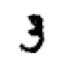

In [ ]:
show_image(threes_tensors[0])

In [ ]:
# club the three image tensors in a single data structure
three_stack=torch.stack(threes_tensors).float()/255
seven_stack=torch.stack(seven_tensors).float()/255

In [ ]:
# shape of each axis of the tensor
three_stack.shape

torch.Size([6131, 28, 28])

In [ ]:
# rank of the tensor
three_stack.ndim

3

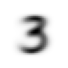

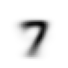

In [ ]:
# calculate the mean of the stacked tensor 
mean_three=three_stack.mean(0)
show_image(mean_three)

mean_seven=seven_stack.mean(0)
show_image(mean_seven)

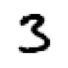

In [ ]:
sample_three=three_stack[125]
show_image(sample_three)


In [ ]:
# find similarity between mean three and seven and the sample image using loss functions
F.l1_loss(sample_three.float(),mean_three),F.l1_loss(sample_three.float(),mean_seven)


(tensor(0.1259), tensor(0.1836))

In [ ]:
F.mse_loss(sample_three,mean_three).sqrt(),F.mse_loss(sample_three,mean_seven).sqrt()

(tensor(0.2290), tensor(0.3390))

In [ ]:
from torchvision.datasets import MNIST


Multi Instance Learning 



In [ ]:
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision.datasets import MNIST
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import time
from torch import nn, optim
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from torch.utils.data import DataLoader

import tensorflow as tf
import os
import time
import datetime

import copy
import re
import yaml
import uuid
import warnings
from functools import partial, reduce
from random import shuffle
import random

import numpy as np
import pandas as pd

from sklearn import metrics as mtx
from sklearn import model_selection as ms
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision.models import resnet


In [ ]:
def getdataloaders(trainbatchsize, valbatchsize):
    # load the mnist dataset 
    mnist = MNIST(download=True, train=True, root=".").train_data.float()
    
    # perform image transformations 
    datatransform = Compose([ Resize((224, 224)),ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])

    # load the train dataset using the image transforms
    trainloader = DataLoader(MNIST(download=True, root=".", transform=datatransform, train=True),
                              batch_size=trainbatchsize, shuffle=True)
    
    # load the validation dataset using the image transforms
    valloader = DataLoader(MNIST(download=False, root=".", transform=datatransform, train=False),
                            batch_size=valbatchsize, shuffle=False)
    return trainloader, valloader

In [ ]:
trainbatchsize = 256
valbatchsize = 256

trainloader, validloader = getdataloaders(trainbatchsize, valbatchsize)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
# train the mnist data on resnet model
class MnistResNet(ResNet):
    def __init__(self):
        super(MnistResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10)
        self.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      
    # forward propagation
    def forward(self, x):
        return torch.softmax(super(MnistResNet, self).forward(x), dim=-1)

In [ ]:
def calculatemetric(metricfn, truey, predy):
    if "average" in inspect.getfullargspec(metricfn).args:
        return metricfn(truey, predy, average="macro")
    else:
        return metricfn(truey, predy)
    
def printscores(p, r, f1, a, batch_size):
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [ ]:
start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# mnist resnet model
model = MnistResNet().to(device)

# 5 epochs
epochs = 

# get training and validation datasets
trainloader, valloader = getdataloaders(trainbatchsize, valbatchsize)
# loss function - cross entropy loss
loss_function = nn.CrossEntropyLoss()         

# optimizer - Ada 
optimizer = optim.Adadelta(model.parameters())

losses = []
batches = len(trainloader)
valbatches = len(valloader)

# loop for every epoch 
for epoch in range(epochs):
    total_loss = 0

    progress = tqdm(enumerate(trainloader), desc="Loss: ", total=batches)

   
    # train  model
    model.train()
    
    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)

        # zero gradient 
        model.zero_grad() 
     
        # forward propagation
        outputs = model(X)          
        # loss function           
        loss = loss_function(outputs, y)    
        # back propagation   
        loss.backward() 
        # optimizer                      
        optimizer.step()                       

        current_loss = loss.item()

        # update the loss
        total_loss += current_loss

        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))
        
   
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    vallosses = 0
    # evaluate the model
    precision, recall, f1, accuracy = [], [], [], []
    

    model.eval()
    with torch.no_grad():
        for i, data in enumerate(valloader):
            X, y = data[0].to(device), data[1].to(device)

            outputs = model(X) 
            # calculate loss                                     
            vallosses += loss_function(outputs, y)
            # predicted labels
            predictedclasses = torch.max(outputs, 1)[1]         
            
            for acc, metric in zip((precision, recall, f1, accuracy), 
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculatemetric(metric, y.cpu(), predictedclasses.cpu())
                )
          
    print(f" epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {vallosses/valbatches}")
    printscores(precision, recall, f1, accuracy, valbatches)
    # store to plot the learning curve 
    losses.append(total_loss/batches) 
print(f" training time: {time.time()-start_ts}s")

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")



Epoch 1/5, training loss: 1.628090897012264, validation loss: 1.5696138143539429
	     precision: 0.9296
	        recall: 0.8976
	            F1: 0.8891
	      accuracy: 0.8994


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 2/5, training loss: 1.4766157383614398, validation loss: 1.6049965620040894
	     precision: 0.8742
	        recall: 0.8576
	            F1: 0.8344
	      accuracy: 0.8617



Epoch 3/5, training loss: 1.4716641497104725, validation loss: 1.4735063314437866
	     precision: 0.9892
	        recall: 0.9887
	            F1: 0.9886
	      accuracy: 0.9891



Epoch 4/5, training loss: 1.4694555373902016, validation loss: 1.4750996828079224
	     precision: 0.9882
	        recall: 0.9874
	            F1: 0.9873
	      accuracy: 0.9877



Epoch 5/5, training loss: 1.4675449437283454, validation loss: 1.4759248495101929
	     precision: 0.9876
	        recall: 0.9868
	            F1: 0.9867
	      accuracy: 0.9867
Training time: 1362.0743532180786s


In [ ]:
# save model 
torch.save(model.state_dict(), 'mnist_state.pt')


In [ ]:
# load train test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
x_train = x_train[:3000]
y_train = y_train[:3000]
x_test = x_test[:900]
y_test = y_test[:900]

In [ ]:
# change the data to float 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalise the values 
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (3000, 28, 28)
Number of images in x_train 3000
Number of images in x_test 900


In [ ]:
# get a sample x value and its label
instanceindexlabel = [(i, y_train[i]) for i in range(x_train.shape[0])]
instanceindexlabeltest = [(i, y_test[i]) for i in range(x_test.shape[0])]

In [ ]:
# find the index for sample label  
findindex = [instanceindexlabel[i][0] for i in range(len(instanceindexlabel)) if instanceindexlabel[i][1]==1]
# find the index for sample label  
findindextest = [instanceindexlabeltest[i][0] for i in range(len(instanceindexlabeltest))
                   if instanceindexlabeltest[i][1]==1]

In [ ]:
print('index:', instanceindexlabel[0][0])         
print('label:', instanceindexlabel[0][1])         

index: 0
label: 5


In [ ]:
import torch
from torchvision.models.resnet import ResNet, BasicBlock

# defiene the resnet model
class MnistResNet(ResNet):
    def __init__(self):
        super(MnistResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10)
        self.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        
    def forward(self, x):
        return torch.softmax(super(MnistResNet, self).forward(x), dim=-1)

In [ ]:
model = MnistResNet()
# load the trained model
model.load_state_dict(torch.load('mnist_state.pt'))
body = nn.Sequential(*list(model.children()))
# take the label values
model = body[:9]
# evaluate the model
model.eval()

Sequential(
  (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
trainbatchsize = 1
valbatchsize = 1
# load the training and validation dataset 
trainloader, valloader = getdataloaders(trainbatchsize, valbatchsize)
# define cross entropy loss 
loss_function = nn.CrossEntropyLoss()

# optimizer - ada delta 
optimizer = optim.Adadelta(model.parameters())

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
losses = []
batches = len(trainloader)
valbatches = len(valloader)

In [ ]:
# loop for every epoch
metatable = dict()
featureresult = []


progress = tqdm(enumerate(trainloader), desc="Loss: ", total=batches)

model.eval()

for i, data in progress:
    if i==3001:
        break
    X, y = data[0], data[1]
    # training for every loop
    model.zero_grad()
    outputs = model(X)
    featureresult.append(outputs.reshape(-1).tolist())
    metatable[i] = outputs.reshape(-1).tolist()
    
featurearray = np.array(featureresult)
np.save('feature_full',featurearray )

In [ ]:
# load
featurearray = np.load('feature_full.npy', allow_pickle=True)

In [ ]:
metatable = dict()
featureresult = []

progress = tqdm(enumerate(valloader), desc="Loss: ", total=batches)

model.eval()

for i, data in progress:
    if i==900:
        break
    X, y = data[0], data[1]
    model.zero_grad()
    outputst = model(X)
    featureresult.append(outputst.reshape(-1).tolist())
    metatable[i] = outputst.reshape(-1).tolist()

featuretestarr = np.array(featureresult)
# save 
np.save('feature_test_full',featuretestarr )

In [ ]:
#load
featuretestarr = np.load('feature_test_full.npy', allow_pickle=True)

In [ ]:
from typing import List, Dict, Tuple
def data_generation(instanceindexlabel: List[Tuple]) -> List[Dict]:
    
    bagsize = np.random.randint(3,7,size=len(instanceindexlabel)//5)
    datacp = copy.copy(instanceindexlabel)
    np.random.shuffle(datacp)
    bags = {}
    bagsperinstancelabels = {}
    bagslabels = {}
    for bag_ind, size in enumerate(bagsize):
        bags[bag_ind] = []
        bagsperinstancelabels[bag_ind] = []
        # find the labels for every bag value 
        try:
            for _ in range(size):
                inst_ind, lbl = datacp.pop()
                bags[bag_ind].append(inst_ind)
                bagsperinstancelabels[bag_ind].append(lbl)
            bagslabels[bag_ind] = bag_labelfrominstancelabels(bagsperinstancelabels[bag_ind])
        except:
            break
    return bags, bagslabels

def bag_labelfrominstancelabels(instance_labels):
    return int(any(((x==1) for x in instance_labels)))

In [ ]:
bagindices, baglabels = data_generation(instanceindexlabel)
bagfeatures = {kk: torch.Tensor(featurearray[inds]) for kk, inds in bagindices.items()}


In [ ]:
# save
import pickle
pickle.dump(bagindices, open( "bagindices", "wb" ) )
pickle.dump(baglabels, open( "baglabels", "wb" ) )
pickle.dump(bagfeatures, open( "bagfeatures", "wb" ) )

In [ ]:
import pickle
bagindices = pickle.load( open( "bagindices", "rb" ) )
baglabels = pickle.load( open( "baglabels", "rb" ) )
bagfeatures = pickle.load( open( "bagfeatures", "rb" ) )

In [ ]:
# get the labels of the sample values 
bagtindices, bagtlabels = data_generation(instanceindexlabeltest)


In [ ]:
bagtfeatures = {kk: torch.Tensor(featuretestarr[inds]) for kk, inds in bagtindices.items()}


In [ ]:
pickle.dump(bagtindices, open( "bagtindices", "wb" ) )
pickle.dump(bagtlabels, open( "bagtlabels", "wb" ) )
pickle.dump(bagtfeatures, open( "bagtfeatures", "wb" ) )

In [ ]:
bagtindices = pickle.load( open( "bagtindices", "rb" ) )
bagtlabels = pickle.load( open( "bagtlabels", "rb" ) )
bagtfeatures = pickle.load( open( "bagtfeatures", "rb" ) )

In [ ]:
from torch.utils.data import Dataset
class Transform_data(Dataset):

    def __init__(self, data, transform=None):
        self.transform = transform
        self.data = data
        
    def __getitem__(self, index):
        tensor = self.data[index][0]
        if self.transform is not None:
            tensor = self.transform(tensor)
        return (tensor, self.data[index][1])

    def __len__(self):
        return len(self.data)

In [ ]:
train_data = [(bagfeatures[i],baglabels[i]) for i in range(len(bagfeatures))]


In [ ]:
bagfeatures[0]


tensor([[0.0248, 0.0945, 1.0929,  ..., 0.3382, 0.1923, 0.1010],
        [0.0098, 0.1964, 1.1581,  ..., 0.3434, 0.0997, 0.0673],
        [0.6322, 0.7665, 1.0547,  ..., 0.0797, 0.5364, 1.3446],
        [0.0555, 0.1374, 0.8411,  ..., 0.2193, 0.0554, 0.1159],
        [0.4577, 0.5648, 0.2573,  ..., 1.6695, 0.4859, 0.5152]])

In [ ]:
def pad_tensor(data:list, max_number_instance) -> list:
 
    new_data = []
    for bag_index in range(len(data)):
        tensor_size = len(data[bag_index][0])
        pad_size = max_number_instance - tensor_size
        p2d = (0,0, 0, pad_size)
        padded = nn.functional.pad(data[bag_index][0], p2d, 'constant', 0)
        new_data.append((padded, data[bag_index][1]))
    return new_data

In [ ]:
max_number_instance = 7
padded_train = pad_tensor(train_data, max_number_instance)

In [ ]:
test_data = [(bagtfeatures[i],bagtlabels[i]) for i in range(len(bagtfeatures))]
padded_test = pad_tensor(test_data, max_number_instance)


In [ ]:
def getdataloaders(train_data, test_data, trainbatchsize, valbatchsize):
    trainloader = DataLoader(train_data, batch_size=trainbatchsize, shuffle=True)
    valloader = DataLoader(test_data, batch_size=valbatchsize, shuffle=False)
    return trainloader, valloader

In [ ]:
trainloader,validloader = getdataloaders(padded_train, padded_test, 1, 1)


In [ ]:
trainbatchsize = 1
valbatchsize = 1

In [ ]:
# define linear model 
class linear(torch.nn.Module):

    def __init__(self, n=7*512, n_out=1, dropout=0.2):
        super(linear, self).__init__()
        self.linear1 = torch.nn.Linear(n, n_out)
        
    def forward(self, x):
        z = self.linear1(x)
        y_pred = torch.sigmoid(z)
        return y_pred

In [ ]:
# define NN model 
class NN(torch.nn.Module):

    def __init__(self, n=7*512, n_mid = 7168, n_out=1, dropout=0.2):
        super(NN, self).__init__()
        self.linear1 = torch.nn.Linear(n, n_mid)
        self.linear2 = torch.nn.Linear(n_mid, n_out)
        self.dropout = torch.nn.Dropout(dropout)
        self.non_linearity = torch.nn.LeakyReLU()
        
    def forward(self, x):
        z = self.linear1(x)
        z = self.non_linearity(z)
        z = self.dropout(z)
        z = self.linear2(z)
        y_pred = torch.sigmoid(z)
        return y_pred

In [ ]:
class NoisyAnd(torch.nn.Module):
    def __init__(self, a=10, dims=[0]):
        super(NoisyAnd, self).__init__()
        self.a = a
        self.b = torch.nn.Parameter(torch.tensor(0.01))
        self.dims =dims
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        mean = torch.mean(x, self.dims, False)
        res = (self.sigmoid(self.a * (mean - self.b)) - self.sigmoid(-self.a * self.b)) / (
              self.sigmoid(self.a * (1 - self.b)) - self.sigmoid(-self.a * self.b))
        return res


class MIL_NN(torch.nn.Module):

    def __init__(self, n=7*512,  n_mid=7168, n_out=1, 
                 n_inst=None, dropout=0.1,
                 noisy_a=4,
                 agg = NoisyAnd(a=4, dims=[0]),
                ):
        super(MIL_NN, self).__init__()
        if agg is None:
            agg = NoisyAnd(a=noisy_a, dims=[0])
        if n_inst is None:
            self.mdl_instance = agg
            n_inst = n
        else:
            self.mdl_instance = nn.Sequential(
                            nn.Linear(n, n_inst),
                            nn.LeakyReLU(),
                            agg,
                            )
        if n_mid == 0:
            self.mdl_bag = LogisticRegression(n_inst, n_out)
        else:
            self.mdl_bag = NN(n_inst, n_mid, n_out, dropout=dropout)

      

    def forward(self, bag_feature):

        y_pred = self.mdl_bag(bag_feature)
        return y_pred

In [ ]:
def calculatemetric(metricfn, truey, predy):
    # calculate the average metric
    if "average" in inspect.getfullargspec(metricfn).args:
        return metricfn(truey, predy, average="macro")
    else:
        return metricfn(truey, predy)
    
def printscores(p, r, f1, a, batch_size):
    # print the evaluation scores
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [ ]:
import numpy as np
start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

lr0 = 1e-4


model = MIL_NN().to(device)

epochs = 10
trainloader, valloader = getdataloaders(padded_train, padded_test, 1, 1)
loss_function = torch.nn.BCELoss(reduction='mean')      # loss function: BCELoss works well for binary class problems


optimizer = optim.SGD(model.parameters(), lr=lr0, momentum=0.9)

losses = []
batches = len(trainloader)
valbatches = len(valloader)

for epoch in range(epochs):
    total_loss = 0

    progress = tqdm(enumerate(trainloader), desc="Loss: ", total=batches)


    model.train()
    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)
        X = X.reshape([1,7*512])
        y = y.type(torch.cuda.FloatTensor)
        model.zero_grad() 
       
        outputs = model(X)                             
        loss = loss_function(outputs, y)              
        loss.backward()                              
        optimizer.step()                               

        current_loss = loss.item()
        total_loss += current_loss

        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))
        
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    vallosses = 0
    precision, recall, f1, accuracy = [], [], [], []
    
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(valloader):
            X, y = data[0].to(device), data[1].to(device)
            X = X.reshape([1,7*512])
            y = y.type(torch.cuda.FloatTensor)
            outputs = model(X)                         
            prediced_classes =outputs.detach().round()
            vallosses += loss_function(outputs, y)
            
           
            for acc, metric in zip((precision, recall, f1, accuracy), 
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculatemetric(metric, y.cpu(), prediced_classes.cpu())
                )
          
    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {vallosses/valbatches}")
    printscores(precision, recall, f1, accuracy, valbatches)
    losses.append(total_loss/batches)                 
print(f"Training time: {time.time()-start_ts}s")

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10, training loss: 0.716743349370857, validation loss: 0.7093181610107422
	     precision: 0.5278
	        recall: 0.5278
	            F1: 0.5278
	      accuracy: 0.5278



Epoch 2/10, training loss: 0.659466325553755, validation loss: 0.7392346262931824
	     precision: 0.5722
	        recall: 0.5722
	            F1: 0.5722
	      accuracy: 0.5722



Epoch 3/10, training loss: 0.6360783016247054, validation loss: 0.8396101593971252
	     precision: 0.5611
	        recall: 0.5611
	            F1: 0.5611
	      accuracy: 0.5611



Epoch 4/10, training loss: 0.6148040963585178, validation loss: 0.7151085734367371
	     precision: 0.5556
	        recall: 0.5556
	            F1: 0.5556
	      accuracy: 0.5556



Epoch 5/10, training loss: 0.5901025368149082, validation loss: 0.7414668798446655
	     precision: 0.5722
	        recall: 0.5722
	            F1: 0.5722
	      accuracy: 0.5722



Epoch 6/10, training loss: 0.5741647567786277, validation loss: 0.7398632764816284
	     precision: 0.5889
	        recall: 0.5889
	            F1: 0.5889
	      accuracy: 0.5889



Epoch 7/10, training loss: 0.5370868514260898, validation loss: 0.6889774203300476
	     precision: 0.6222
	        recall: 0.6222
	            F1: 0.6222
	      accuracy: 0.6222



Epoch 8/10, training loss: 0.4995142302227517, validation loss: 0.7262044548988342
	     precision: 0.5444
	        recall: 0.5444
	            F1: 0.5444
	      accuracy: 0.5444



Epoch 9/10, training loss: 0.482985733486712, validation loss: 0.798028826713562
	     precision: 0.5722
	        recall: 0.5722
	            F1: 0.5722
	      accuracy: 0.5722



Epoch 10/10, training loss: 0.46594158640674627, validation loss: 0.7509270906448364
	     precision: 0.5667
	        recall: 0.5667
	            F1: 0.5667
	      accuracy: 0.5667
Training time: 52.82302165031433s
